### Content
1. Explicit computation of $\Sigma(W^{1,1},g_{t_0,t_1})$
2. Plots of $\Sigma(W^{1,1},g_{t_0,t_1})$
3. Verification of compatibility with the Urakawa results: Multiplicities add up
4. Consistency check for the basic eigenvalues: $\Sigma(\mathbb{CP}^2)$

### 1. Explicit computation of $\Sigma(W^{1,1},g_{t_0,t_1})$
Each eigenvalue is generated by an $U(2)^{\bullet}$-spherical representation $\varrho(z_1,z_2,z_3)$:
- For $i=1,2,3$ the parameters $\text{max}\_z_{i}$ can be chosen freely under the condition $\text{max}\_z_{1}\geq \text{max}\_z_{2}$ and denote the highest possible value of $z_i$.
- The function $p(a_1,a_2):=\wp(a_1,a_2)$ denotes the partition function
- The function $m(z_1,z_2,z_3)=[\varrho(z_1,z_2,z_3)\restriction U^{\bullet}(2): 1_{U^{\bullet}(2)}]$ computes the dimension of $V_{\varrho(z_1,z_2,z_3)}^{U^{\bullet}(2)}$
- The function $\text{mult}(z_1,z_2,z_3)=\dim(V_{\varrho(z_1,z_2,z_3)})\dim(V_{\varrho(z_1,z_2,z_3)}^{U^{\bullet}(2)})$ computes the dimension of the eigenspace corresponding to $\varrho(z_1,z_2,z_3)$
- The corresponding eigenvalue is denoted by $\eta(z_1, z_2, z_3, t_0, t_1)$
- Deleting the symbol # of #results.sort(key=lambda x: x[3]) results in listing the eigenvalues by size. This is only possible if explicit values for $t_0,t_1$ are chosen

In [1]:
import numpy as np
import sympy as sp
import math

t1,t0, α, δ =sp.symbols('t1 t0 α δ', positive=True)
#t0=t1=2 #belongs to Subsection 3.5
#t0=1/2 #belongs to Subsubsection 3.6.1
#t0=1/(2*α*δ) 
#t1=1/(δ**2)
max_z1=20
max_z2=20
max_z3=20

def p(a1, a2):
    if a1 % 3 != 0:
        return 0
    count = 0
    for m1 in range(0, (a1 // 3) + 1):
        m3 = a2 + m1 + 2 * ((a1 - 3 * m1) / 3)
        if m3 >= 0 and m3 == int(m3):
            count += 1
    return count

def m(z1,z2,z3):    
    return p(z1+z2,-z3-(z1+2)) + p(z1-2*z2-3,(z2+1)-z3) +p((z2-2*z1-6),-z3+(-z2+z1+1)) - p(z1+z2,-z3-(z2+1)) - p(z1-2*z2-3,(z2-1-z1)-z3) -p((z2-2*z1-6),(z1+2-z3)) - p(z1+z2,z3-(z1+1)) - p(z1-2*z2-3,z2+2+z3) -p((z2-2*z1-6),((z1-z2)+2+z3)) + p(z1+z2,z3-z2) + p(z1-2*z2-3,(z2-z1)+z3) + p((z2-2*z1-6),(z1+3+z3))
def mult(z1,z2,z3): 
    return (m(z1,z2,z3))*(z1-z2+1)*(z1+2)*(z2+1)*(2*z3+1)/2  

def η(z1, z2, z3, t0, t1): 
        return  4 * (z1**2 + z2**2 - z1 * (z2 - 3)) / (3 * t0) -4*(z3**2 + z3) / t0 +4*(z3**2 + z3) /  t1 
    
results = [] #creating the set of eigenvalues
for z1 in range(0, max_z1):
    for z2 in range(0, max_z2):
        for z3 in range(0, max_z3):
            m_value = m(z1, z2, z3)
            if m_value > 0 and z1>=z2:
                η_value = η(z1, z2, z3,t0,t1)
                results.append((z1, z2, z3,  η_value, mult(z1,z2,z3)))               
#results.sort(key=lambda x: x[3]) # Sort list by size of η. ATTENTION: This is not possible if symbolic computations are done.
print("{:<5}{:<5}{:<5} {:<20} {:<20}".format("z1",  "z2",  "z3", "η(z1,z2,z3,t0,t1)", "mult(z1,z2,z3)"))

# Print the eigenvalues
for result in results:
    z1v = str(result[0])
    z2v= str(result[1])
    z3v=str(result[2])
    eta_value = str(result[3])  
    mult_value = str(int(result[4])) 
    print("{:<5}{:<5}{:<5} {:<20} {:<20}".format(z1v,z2v,z3v, eta_value, mult_value))


z1   z2   z3    η(z1,z2,z3,t0,t1)    mult(z1,z2,z3)      
0    0    0     0                    1                   
2    1    0     12/t0                8                   
2    1    1     4/t0 + 8/t1          24                  
3    0    1     16/t0 + 8/t1         30                  
3    3    1     16/t0 + 8/t1         30                  
4    2    0     32/t0                27                  
4    2    1     24/t0 + 8/t1         81                  
4    2    2     8/t0 + 24/t1         135                 
5    1    1     40/t0 + 8/t1         105                 
5    1    2     24/t0 + 24/t1        175                 
5    4    1     40/t0 + 8/t1         105                 
5    4    2     24/t0 + 24/t1        175                 
6    0    2     48/t0 + 24/t1        140                 
6    3    0     60/t0                64                  
6    3    1     52/t0 + 8/t1         192                 
6    3    2     36/t0 + 24/t1        320                 
6    3    3   

### 2. Plots of $\Sigma(W^{1,1},g_{t_0,t_1})$
Below is the code for plotting three different variations of the spectrum:
- a) plot with $t_0=0.5$ and $t_1$ is variable  
- b) plot with constant volume, i.e. $t_1=t_0^{-3/4}$
- c) plot with $t_0=0.5$ and $t_1$ is variable; each eigenvalue is devided by the scalar curvature. Note that the scalar curvature vanishes for $t_1=4.12$

Each variation is plotted in two different domains of $t_1$.

C:\Users\User\AppData\Local\Temp\ipykernel_24600\773095116.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', n_colors)


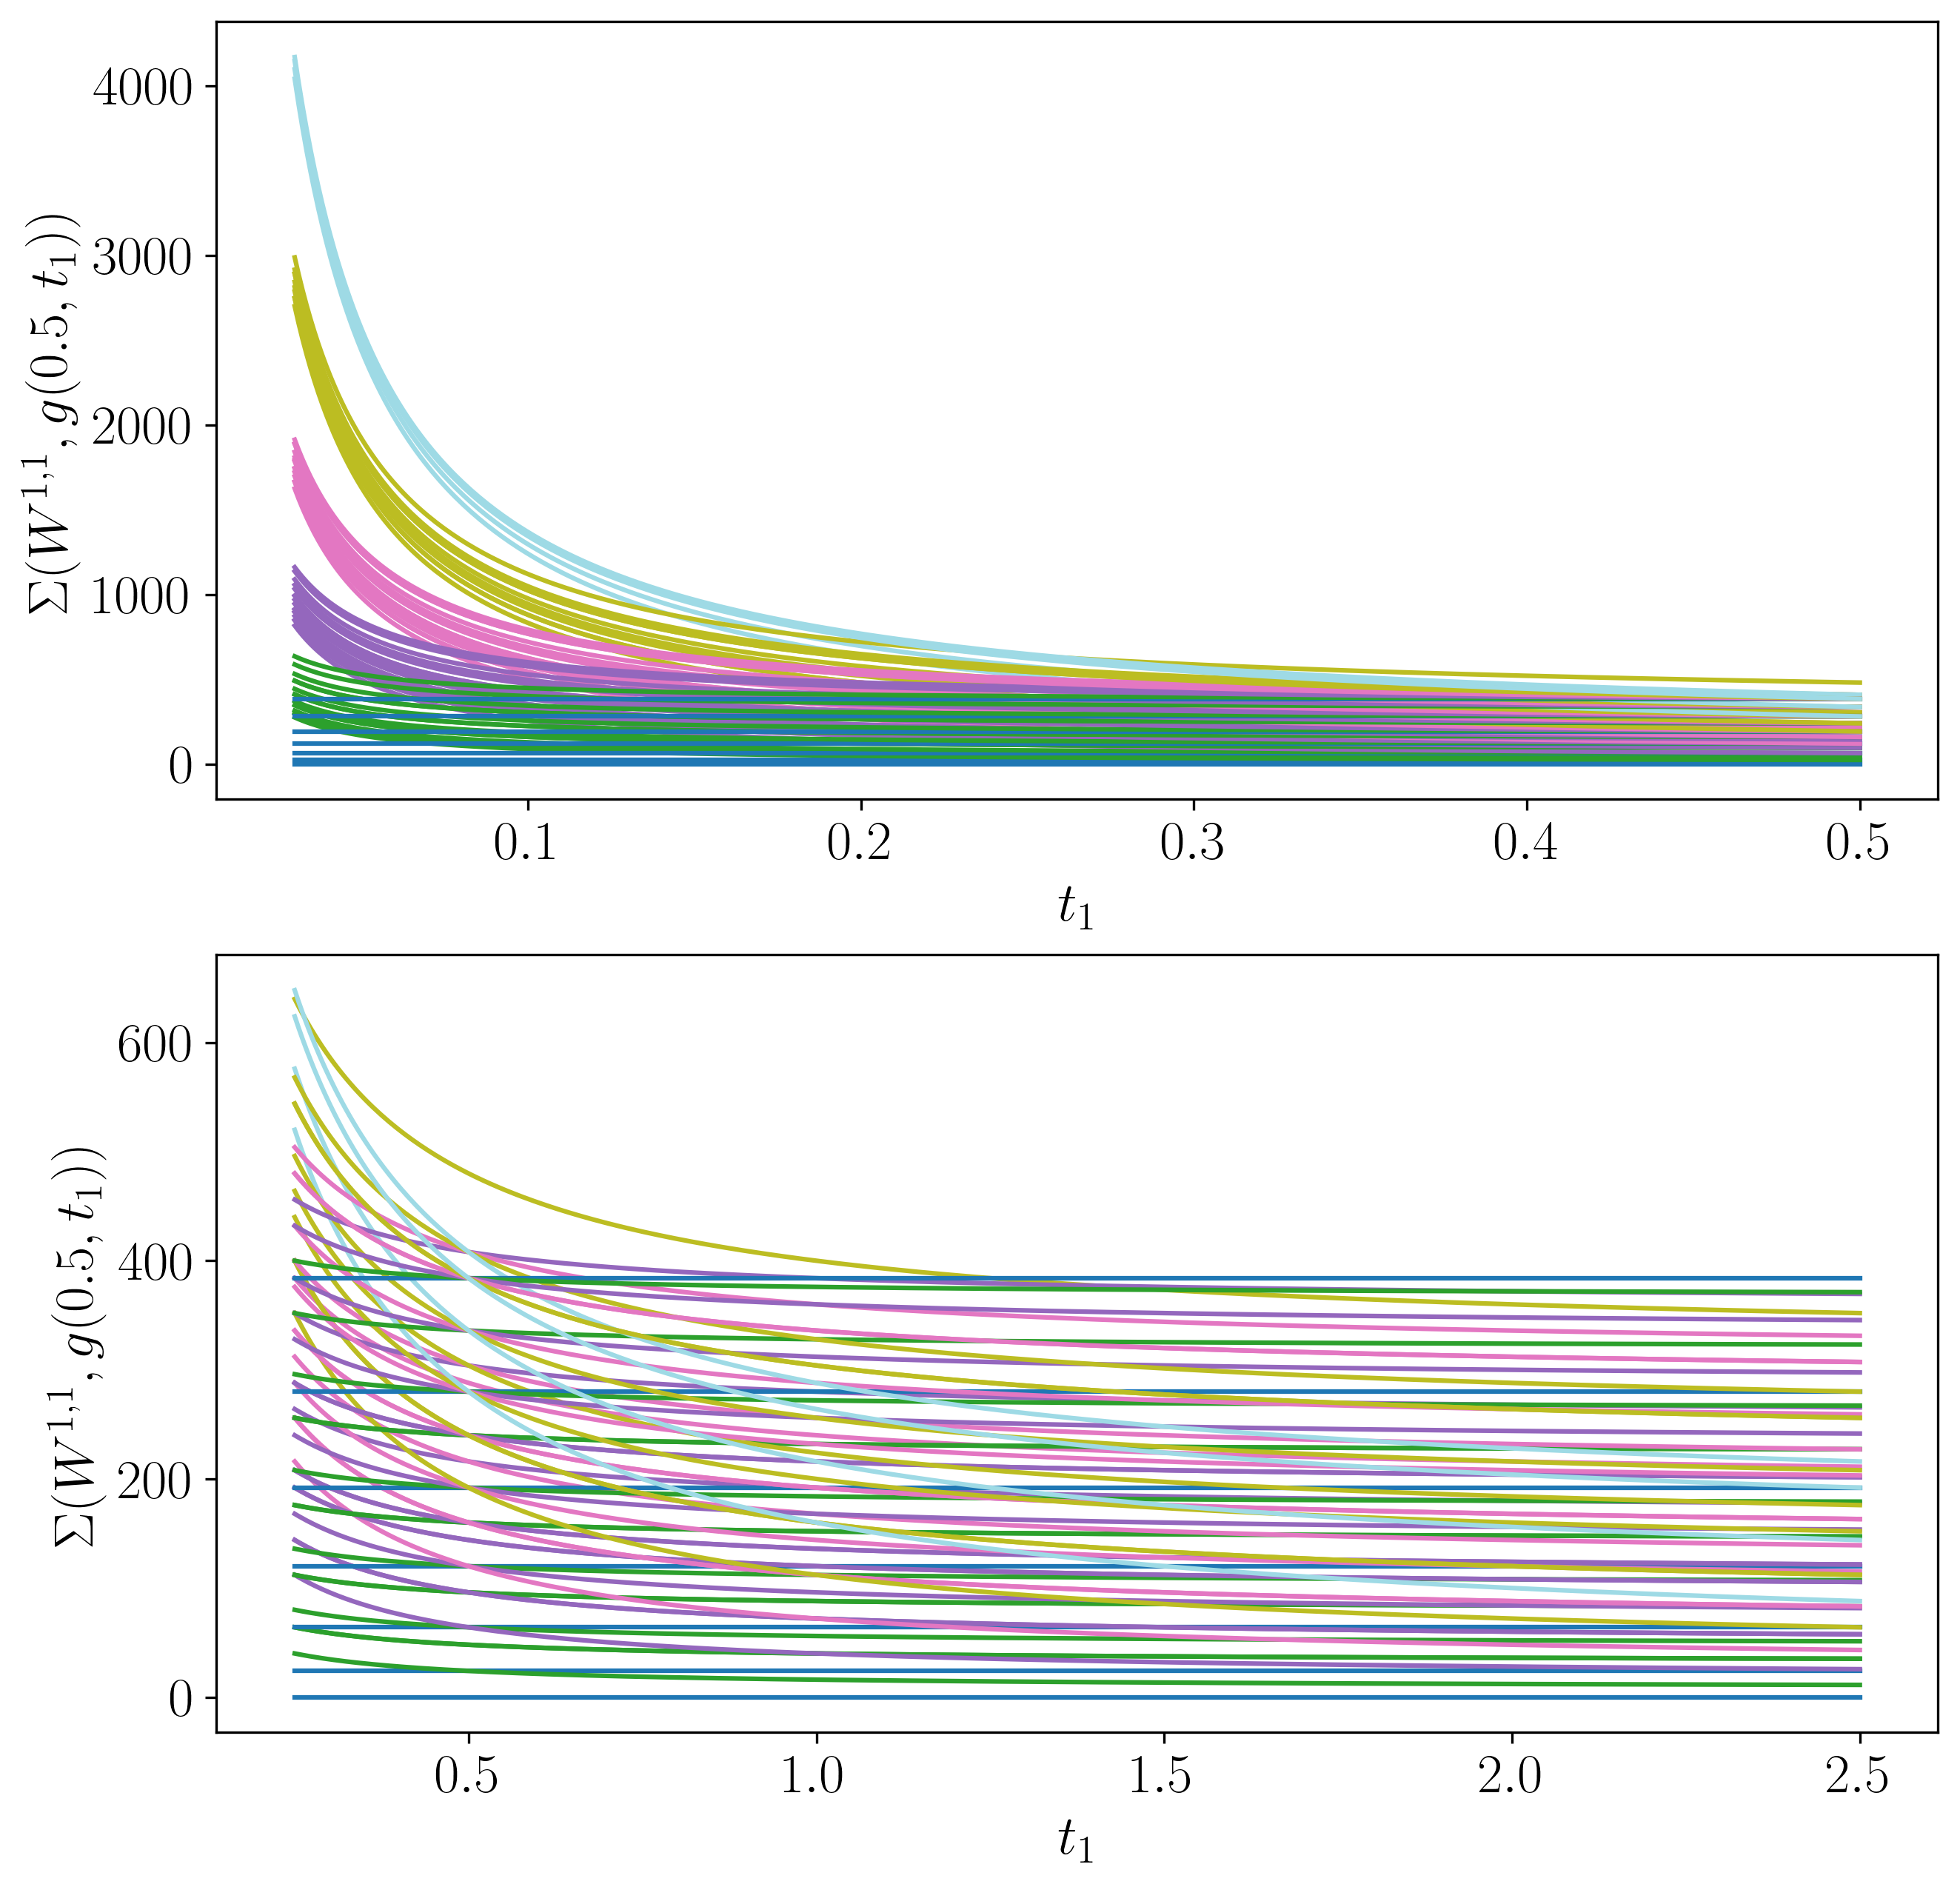

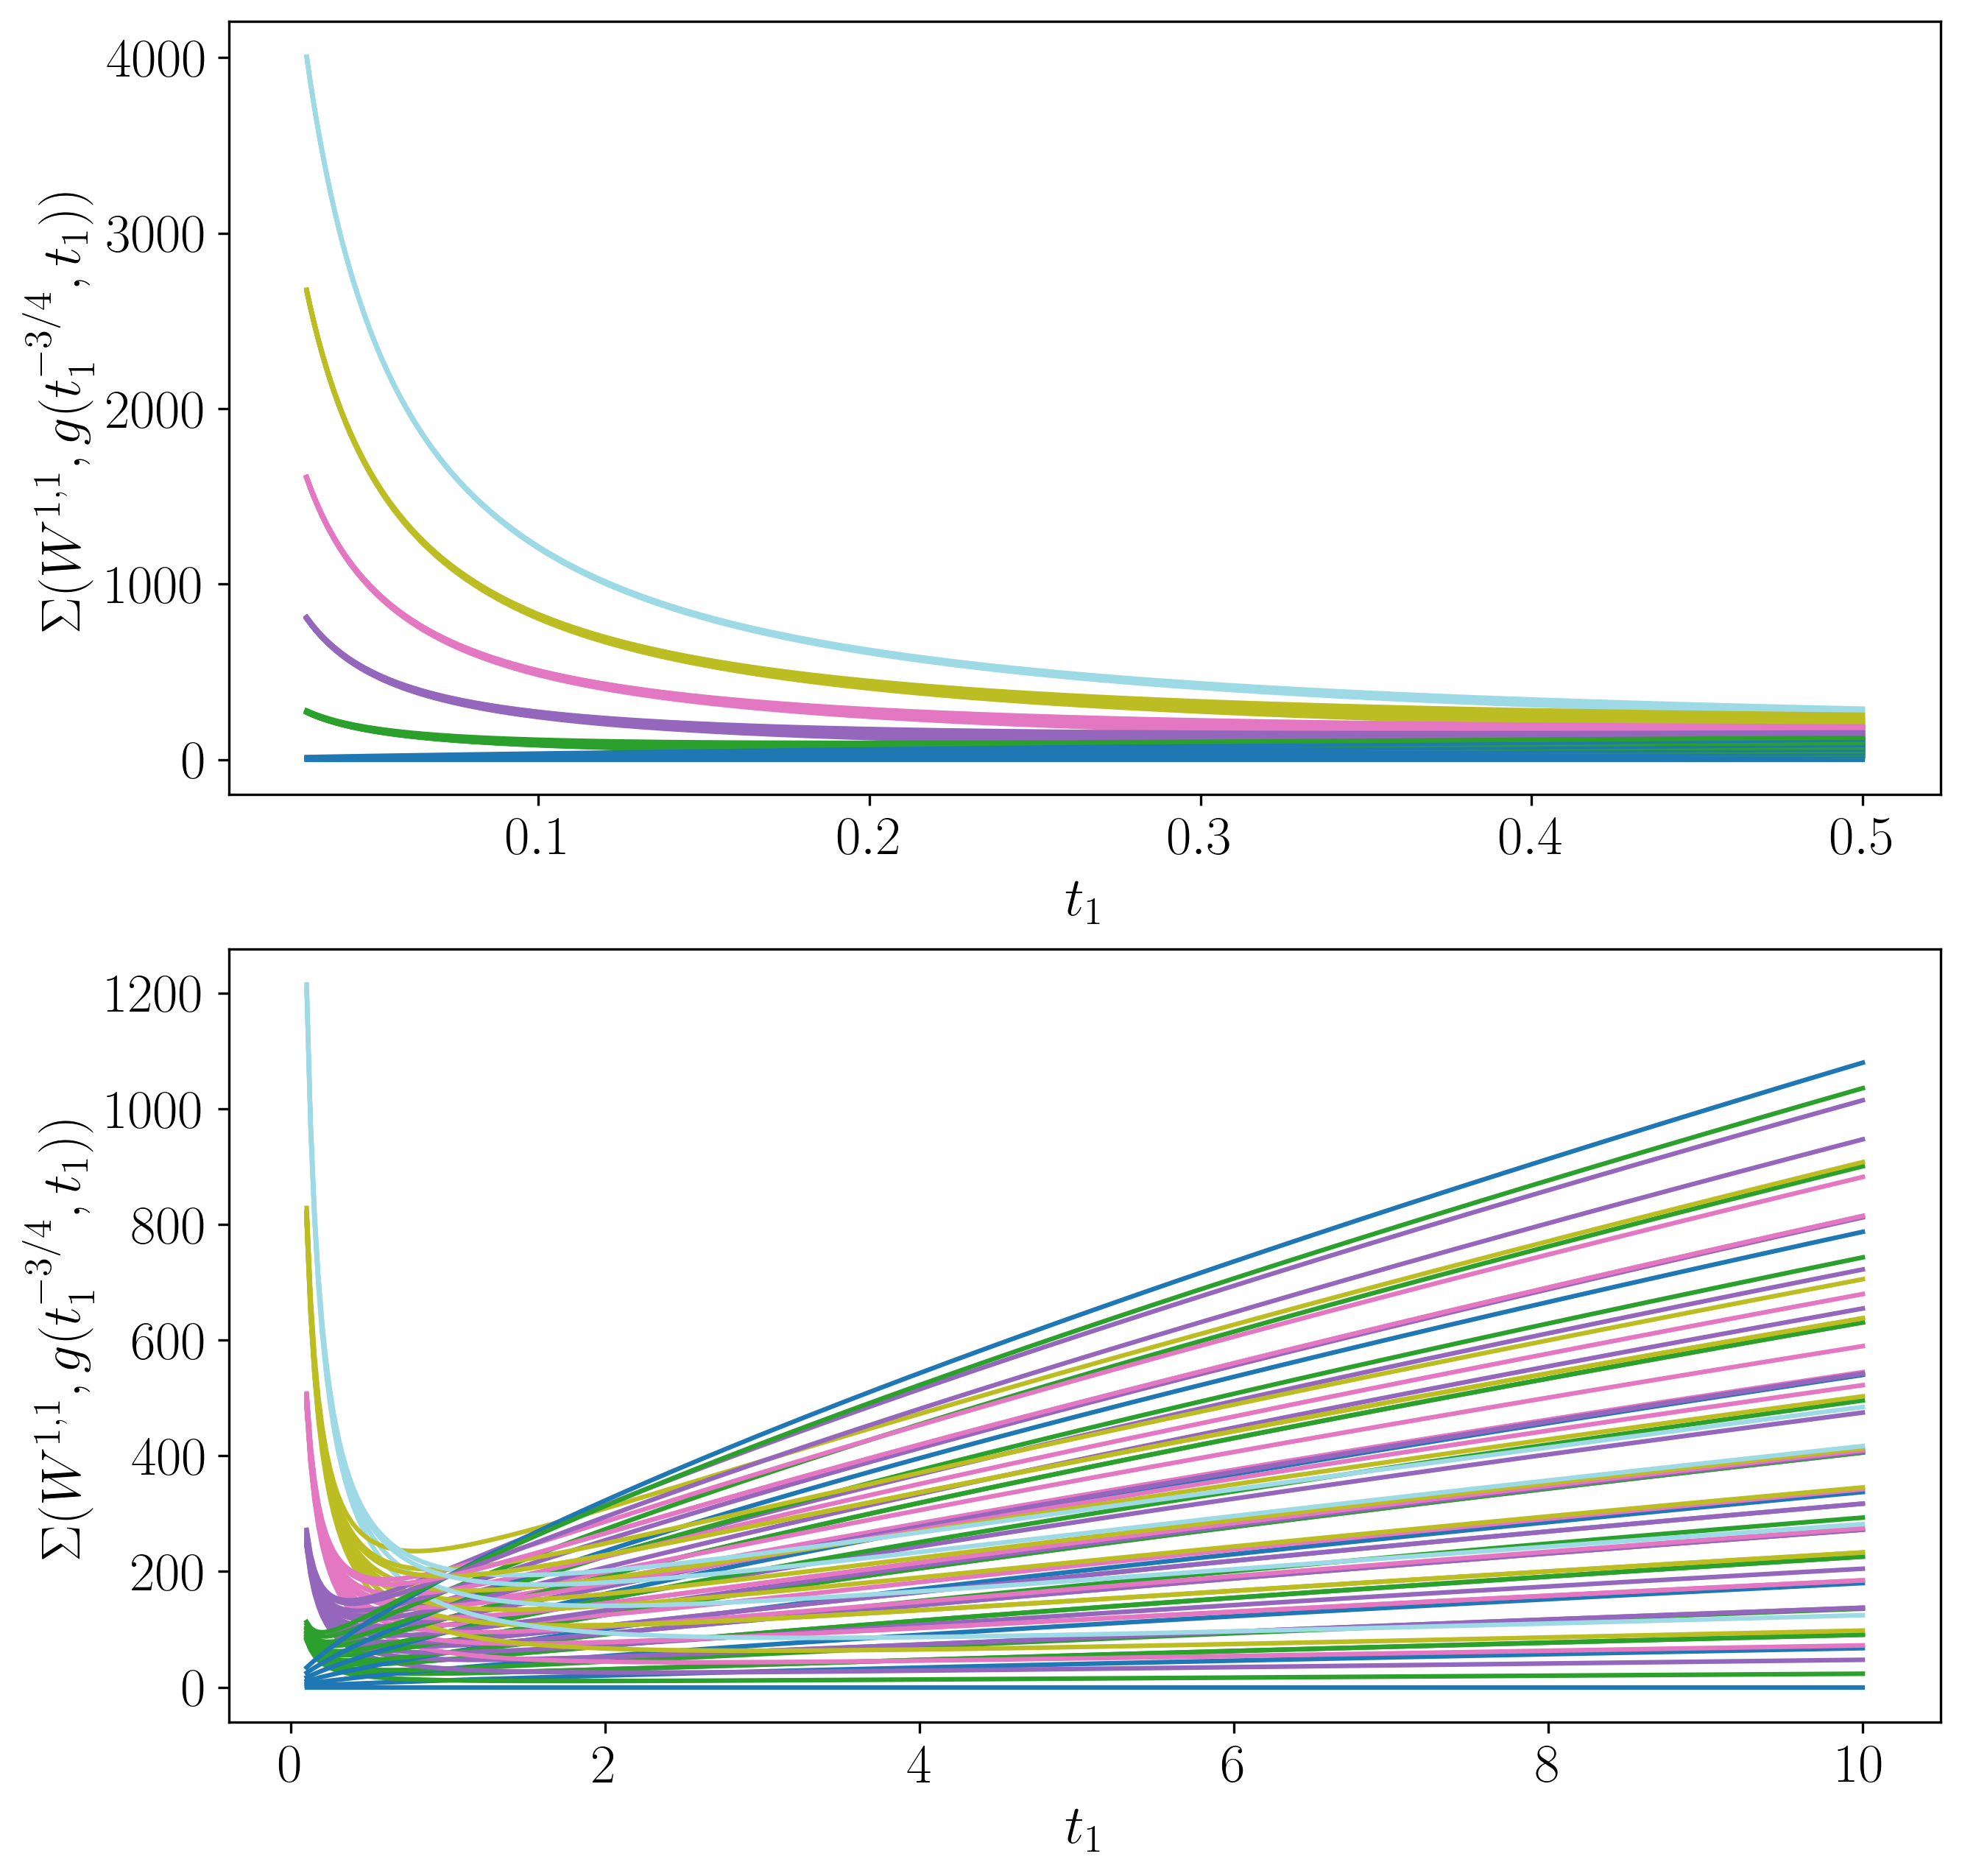

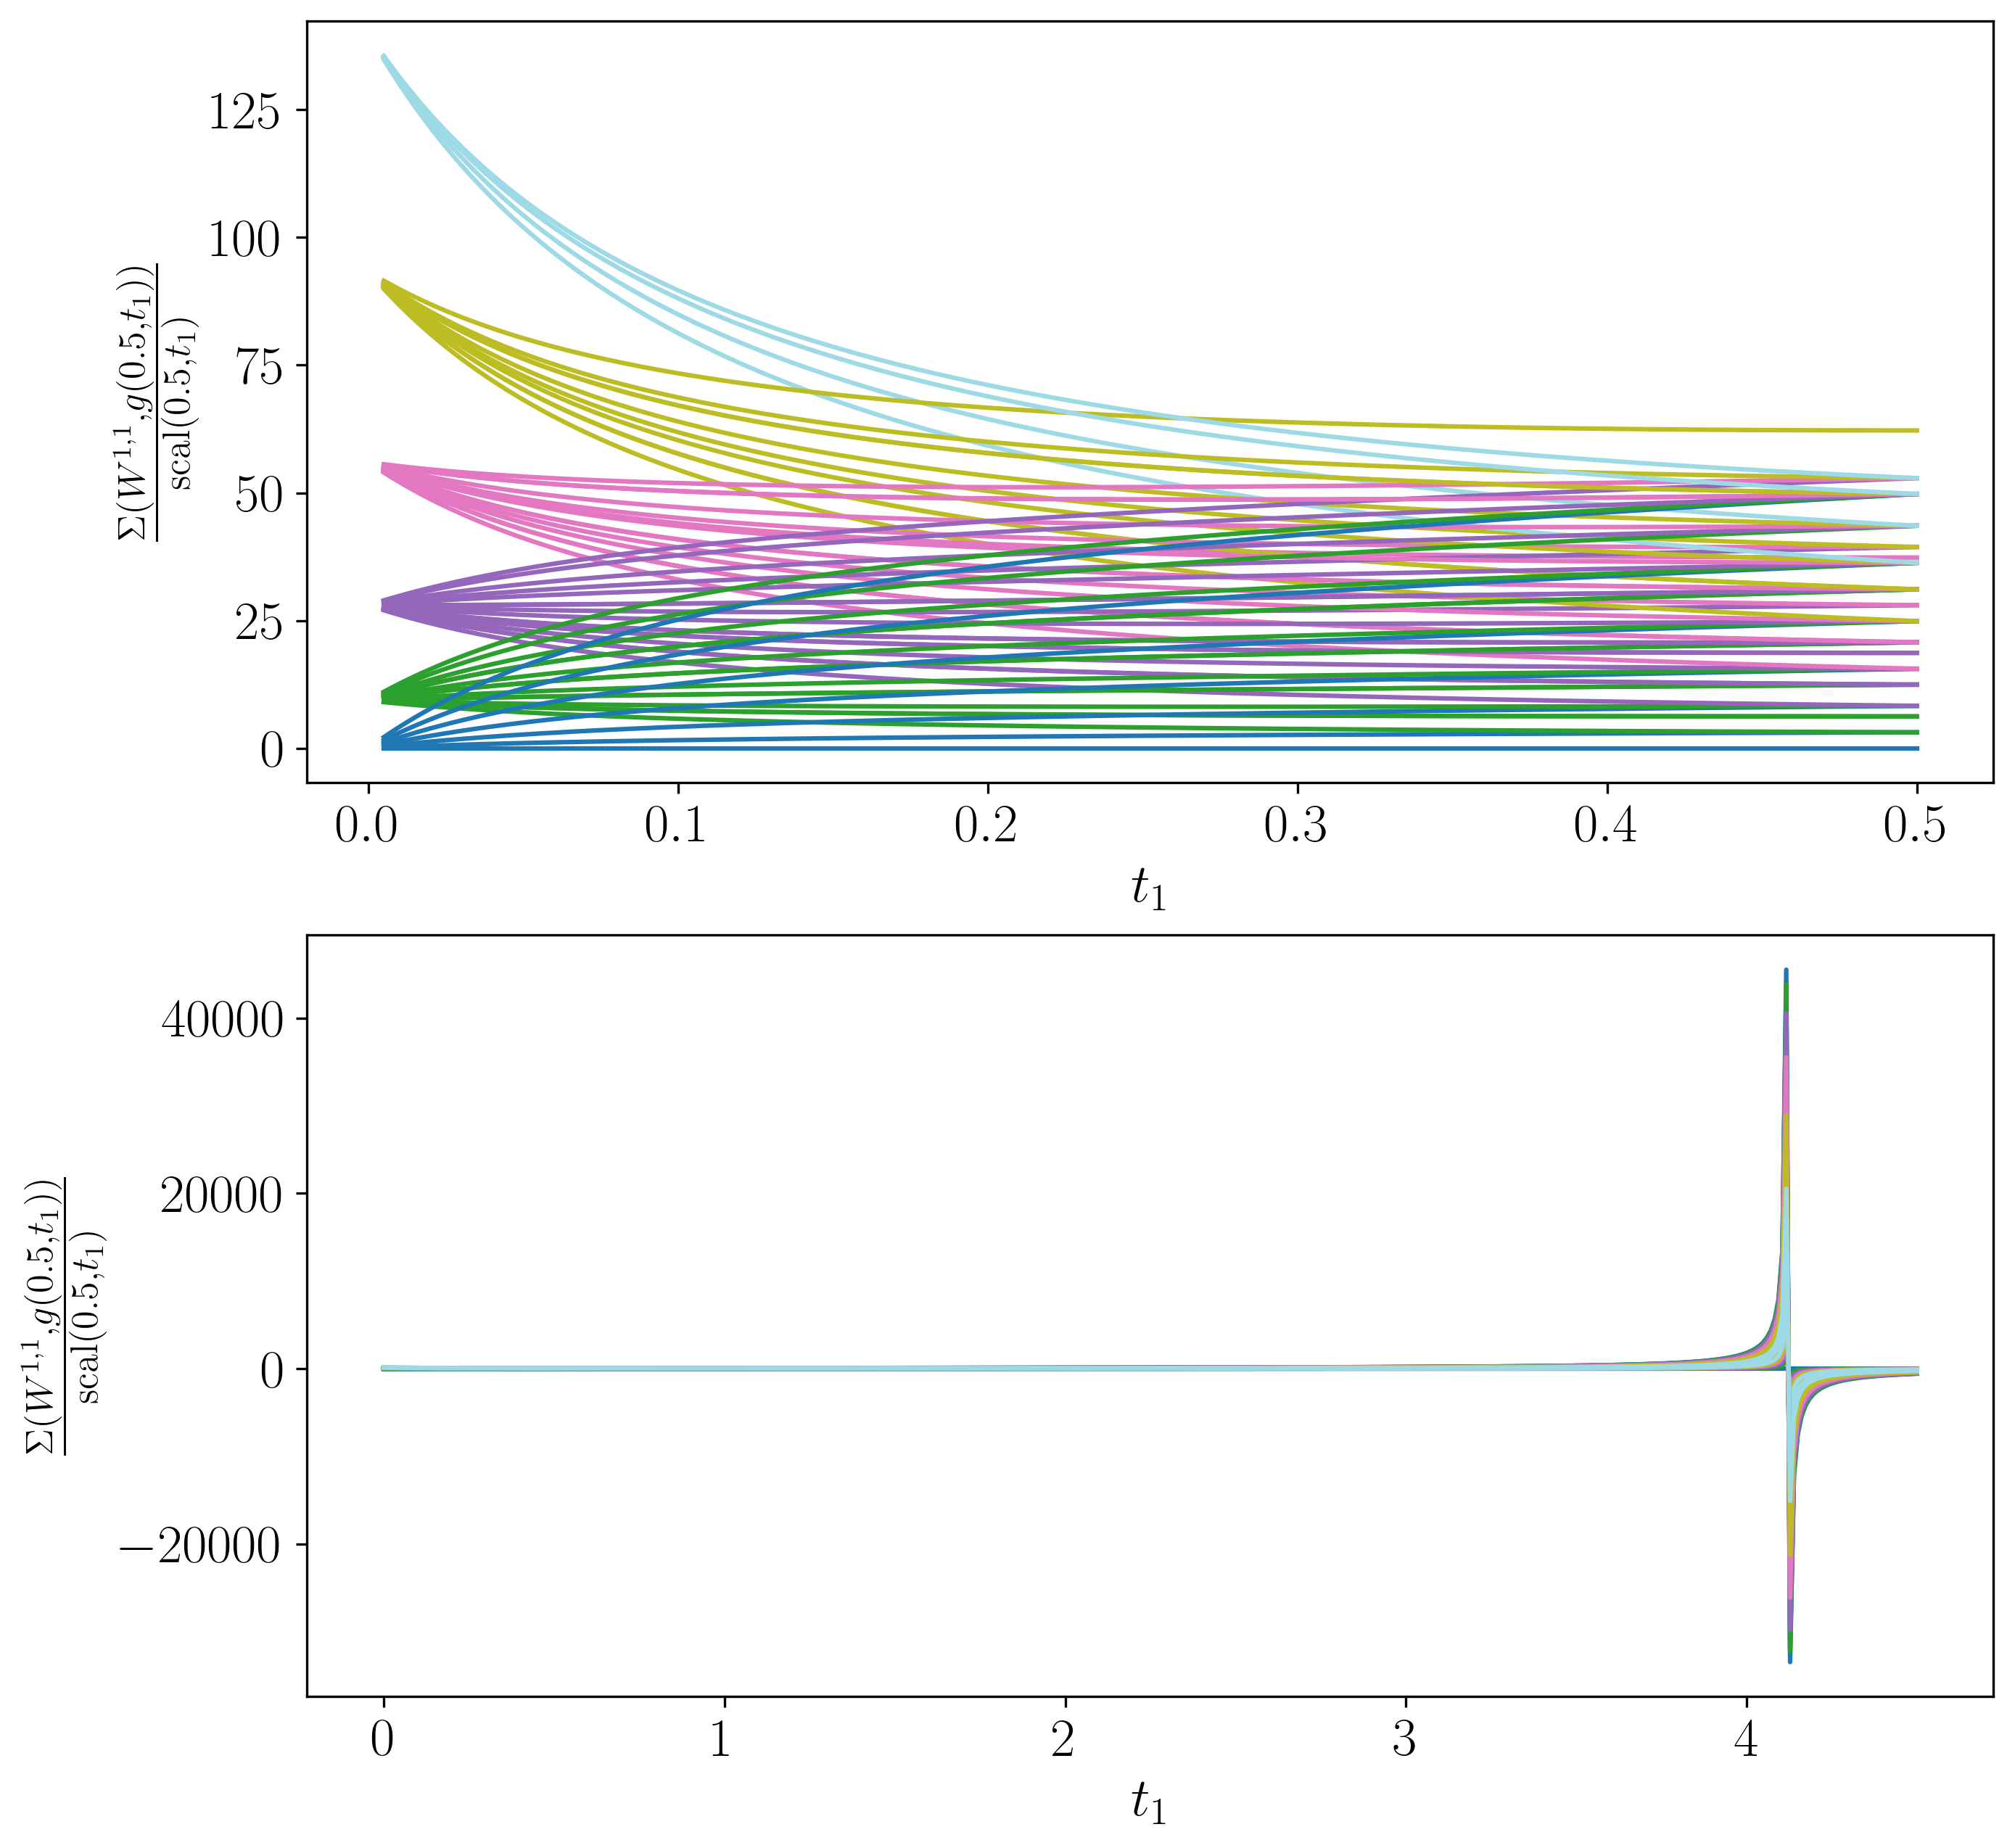

In [1]:
import numpy as np
import matplotlib.pyplot as plt
max_z1=13
max_z2=7
max_z3=6
#------------------------------------------------------------------------------
#Adapt the labeling of the axis to the latex format (only for optical reasons)
plt.rcParams["text.usetex"] = True
# Set the font size
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'serif'
#------------------------------------------------------------------------------

def p(a1, a2): 
    if a1 % 3 != 0:
        return 0

    count = 0
    for m1 in range(0, (a1 // 3) + 1):
        m3 = a2 + m1 + 2 * ((a1 - 3 * m1) // 3)
        if m3 >= 0:
            count += 1
    return count

def m(z1,z2,z3):  
    return p(z1+z2,-z3-(z1+2)) + p(z1-2*z2-3,(z2+1)-z3) +p((z2-2*z1-6),-z3+(-z2+z1+1)) - p(z1+z2,-z3-(z2+1)) - p(z1-2*z2-3,(z2-1-z1)-z3) -p((z2-2*z1-6),(z1+2-z3)) - p(z1+z2,z3-(z1+1)) - p(z1-2*z2-3,z2+2+z3) -p((z2-2*z1-6),((z1-z2)+2+z3)) + p(z1+z2,z3-z2) + p(z1-2*z2-3,(z2-z1)+z3) + p((z2-2*z1-6),(z1+3+z3))
# Save the parameters (z1,z2,z3) which are going to define functions in a list:
funcs = [] #creating the set of eigenvalues


for z1 in range(0, max_z1):
    for z2 in range(0, max_z2):
        for z3 in range(0, max_z3):
            m_value = m(z1, z2, z3)
            if m_value > 0 and z1>=z2:        #if (z1,z2,z3) is a spherical representation (i.e. m(z1,z2,z3)>0) this gives an eigenvalue
                funcs.append((z1, z2, z3))

t0=r1=0.5

# Assign a unique color to each z3
unique_z3 = sorted(set(z3 for z1, z2, z3 in funcs))
n_colors = len(unique_z3)
cmap = plt.cm.get_cmap('tab20', n_colors) 
z3_to_color = {z3: cmap(idx) for idx, z3 in enumerate(unique_z3)}


#we plot the eigenvalues with respect to t1<2, t0=2 is fixed.
def η(z1,z2,z3,t1,t0):
    return (4* (z3**2 + z3) * (1/t1 - 1/t0) + 4 * (z1**2 + z2**2 - z1 * (z2 - 3)) / (3 * t0))
#scalar curvature
def scal(t1,t0):
    return 0.428571428571429*t1/t0**2 + 4*(-1.5*t1 + 6.0*t0)/(7*t0**2) + 0.857142857142857/t1
#-------------------------------------------------------------------------------------------
#defining different domains with 400 equidistant data points
#a) unmodified eigenvalues
t1_values1a = np.linspace(0.03, 0.5, 400)  #domain a1
t1_values2a = np.linspace(0.25, 2.5, 400)  #domain a2   

#b) eigenvalues, vol is constant
t1_values1b = np.linspace(0.03, 0.5, 400)  #domain b1
t1_values2b = np.linspace(0.1, 10, 400)    #domain b2 

#c) eigenvalues/scalarcurvature
t1_values1c = np.linspace(0.005, 0.5, 400)  #domain c1
t1_values2c = np.linspace(10e-100, 4.5, 400)  #domain c2 

# Plot of the different graphs:
#----------------------------------------------------------------------------------------------

# a) Plot η(z1,z2,z3, t1_values1)
fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(10,10), dpi=300)

for a in funcs:
    z1, z2, z3 = a 
    color = z3_to_color[z3]  # Get the color for this z3 value
    ax2.plot(t1_values1a, η(z1, z2, z3, t1_values1a, t0), color=color) #functions of domain 1a

for a in funcs:
    z1, z2, z3 = a
    color = z3_to_color[z3]
    ax1.plot(t1_values2a, η(z1, z2, z3, t1_values2a, t0), color=color) #functions of domain 2a



# Add label to x-axis
ax1.set_ylabel(r"$\Sigma(W^{1,1},g(0.5,t_{1}))$")
ax1.set_xlabel(r"$t_{1}$")
ax2.set_ylabel(r"$\Sigma(W^{1,1},g(0.5,t_{1}))$")
ax2.set_xlabel(r"$t_{1}$")

fig.savefig("eigenvalues_unmodified.png", bbox_inches='tight', dpi=200) #saves the picture

#----------------------------------------------------------------------------------------------
                 
# b) Plot η(z1,z2,z3, t1_values1) where vol=const
fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(10,10), dpi=300)

for a in funcs:
    z1, z2, z3 = a 
    color = z3_to_color[z3]
    ax2.plot(t1_values1b, η(z1, z2, z3, t1_values1b, t1_values1b**(-3/4)), color=color) #functions of domain 1b

for a in funcs:
    z1, z2, z3 = a
    color = z3_to_color[z3]
    ax1.plot(t1_values2b, η(z1, z2, z3, t1_values2b, t1_values2b**(-3/4)), color=color) #functions of domain 2b


# Add label to x-axis
ax1.set_ylabel(r"$\Sigma(W^{1,1},g(t_{1}^{-3/4},t_{1}))$")
ax1.set_xlabel(r"$t_{1}$")
ax2.set_ylabel(r"$\Sigma(W^{1,1},g(t_{1}^{-3/4},t_{1}))$")
ax2.set_xlabel(r"$t_{1}$")

fig.savefig("eigenvalues_vol_const.png", bbox_inches='tight', dpi=300)

#----------------------------------------------------------------------------------------------
# c) Plot η(z1,z2,z3, t1_values1)/scal(t1_values1,t0)
fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(10,10), dpi=300)

for a in funcs:
    z1, z2, z3 = a 
    color = z3_to_color[z3]
    ax2.plot(t1_values1c, η(z1, z2, z3, t1_values1c, t0)/scal(t1_values1c, t0), color=color) #functions of domain 1c

for a in funcs:
    z1, z2, z3 = a
    color = z3_to_color[z3]
    ax1.plot(t1_values2c, η(z1, z2, z3, t1_values2c, t0)/scal(t1_values2c, t0), color=color)  #functions of domain 2c


# Add label to x-axis
ax1.set_ylabel(r"$\frac{\Sigma(W^{1,1},g(0.5,t_{1}))}{\mathrm{scal}(0.5,t_1)}$")
ax1.set_xlabel(r"$t_{1}$")
ax2.set_ylabel(r"$\frac{\Sigma(W^{1,1},g(0.5,t_{1}))}{\mathrm{scal}(0.5,t_1)}$")
ax2.set_xlabel(r"$t_{1}$")

#----------------------------------------------------------------------------------------------

fig.savefig("eigenvalues_total_curvature.png", bbox_inches='tight', dpi=300)   #saves the plots
plt.show()

### 3. Verification of compatibility with the Urakawa results: Multiplicities add up
We verify that the sum of the multiplicities over all $U^{\bullet}(2)$-spherical representations  $\varrho(z_1,z_2,z_3)$ where $(z_1,z_2)$ is fixed, yields precisely the multiplicity $\text{mult}(z_1,z_2)$ computed by Urakawa. The number max_range may be adjusted. It determines the range of $z_1$ and $z_2$. Representations which do not match are displayed first. We are not able to find any. 

In [2]:
max_range = 80  # Adjust this value depending on your computational resources
# ================================ Our results ================================

def p(a1, a2): #computation of the partition function
    if a1 % 3 != 0:
        return 0

    count = 0
    for m1 in range(0, (a1 // 3) + 1):
        m3 = a2 + m1 + 2 * ((a1 - 3 * m1) // 3)
        if m3 >= 0:
            count += 1
    return count

def m(z1, z2, z3):  # Computation if (z1,z2,z3) is a spherical representation and how often the trivial rep occurs
    return p(z1+z2,-z3-(z1+2)) + p(z1-2*z2-3,(z2+1)-z3) +p((z2-2*z1-6),-z3+(-z2+z1+1)) - p(z1+z2,-z3-(z2+1)) - p(z1-2*z2-3,(z2-1-z1)-z3) -p((z2-2*z1-6),(z1+2-z3)) - p(z1+z2,z3-(z1+1)) - p(z1-2*z2-3,z2+2+z3) -p((z2-2*z1-6),((z1-z2)+2+z3)) + p(z1+z2,z3-z2) + p(z1-2*z2-3,(z2-z1)+z3) + p((z2-2*z1-6),(z1+3+z3))

def mult(z1, z2, z3):  # Computation of the multiplicites of each representation
    return (m(z1,z2,z3))*(z1-z2+1)*(z1+2)*(z2+1)*(2*z3+1)/2

#Computing the rest in a loop:

grouped_results_first_method = {} #this is a dictronary where the key is supposed to be (z1,z2) and the value is m(z1,z2,z3)
for z1 in range(0, max_range):
    for z2 in range(0, max_range):
        for z3 in range(0, max_range):
            m_value = m(z1, z2, z3)
            if m_value > 0 and z1 >= z2: #this is precisely the case if we have a U(2)-spherical representation
                mult_value = mult(z1, z2, z3) 
                key = (z1, z2) #we want to add up the multiplicites of two representations with the same z1, z2 value
                if key not in grouped_results_first_method:
                    grouped_results_first_method[key] = 0
                grouped_results_first_method[key] += mult_value #here we change the value of the key (z1,z2) the mult_value.

# ================================ Results of Urakawa ================================
from sympy import symbols

k, l = symbols('k l', integer=True)
k = 1
l = 1
# Computation of S^1 spherical representations:
def d(z1, z2): # Dimension of the SU(3) representation
    return (z1 - z2 + 1) * (z1 + 2) * (z2 + 1) / 2

results_second_method = set()

for n_1 in range(0, max_range): # Selecting the S^1 spherical representations and computing the multiplicities
    for n_2 in range(0, max_range):
        count = 0
        for P in range(n_1 + 1):
            for q in range(n_2 + 1):
                for r in range(P + n_2 - q + 1):
                    if k * n_1 - l * n_2 - (2 * k + l) * P + (l - k) * q + (k + 2 * l) * r == 0:
                        count += 1
        if count > 0:
            z1 = n_1 + n_2
            z2 = n_2
            mult_value = d(z1, z2) * count
            results_second_method.add((z1, z2, mult_value))

grouped_results_second_method = {(z1, z2): mult for z1, z2, mult in results_second_method} #here we construct a second dictionary with the results of Urakawa: (z1,z2) are the keys, the multiplicites are the values.

# ================================ Comparison of the multiplicites ================================

comparison_results = {}

for key in grouped_results_first_method: 
    value_from_first_method = grouped_results_first_method[key]
    
    #for each key of the first method (our method) we search for the key of the second method (Urakawas method) and compare their values
    if key in grouped_results_second_method:
        value_from_second_method = grouped_results_second_method[key]
        values_match = value_from_first_method == value_from_second_method #the key becomes a key of the new dictionary and its values are the values of the first dic, the second dic and the last one checks if both coincide.
    else: #if we can not find the key of the first method in the second method
        value_from_second_method = None
        values_match = False

    comparison_results[key] = (value_from_first_method, value_from_second_method, values_match)

# Sort so that "False" entries are displayed first

sorted_comparison = sorted(comparison_results.items(), key=lambda x: x[1][2]) # When sorting based on boolean values using the 'sorted' function, items with the value 'False' (which corresponds to 0) come before items with the value 'True' (which corresponds to 1).

# Output the sorted results
for key, value in sorted_comparison:
    print(key, ":", value)


(0, 0) : (1.0, 1.0, True)
(2, 1) : (32.0, 32.0, True)
(3, 0) : (30.0, 30.0, True)
(3, 3) : (30.0, 30.0, True)
(4, 2) : (243.0, 243.0, True)
(5, 1) : (280.0, 280.0, True)
(5, 4) : (280.0, 280.0, True)
(6, 0) : (140.0, 140.0, True)
(6, 3) : (1024.0, 1024.0, True)
(6, 6) : (140.0, 140.0, True)
(7, 2) : (1215.0, 1215.0, True)
(7, 5) : (1215.0, 1215.0, True)
(8, 1) : (960.0, 960.0, True)
(8, 4) : (3125.0, 3125.0, True)
(8, 7) : (960.0, 960.0, True)
(9, 0) : (385.0, 385.0, True)
(9, 3) : (3696.0, 3696.0, True)
(9, 6) : (3696.0, 3696.0, True)
(9, 9) : (385.0, 385.0, True)
(10, 2) : (3402.0, 3402.0, True)
(10, 5) : (7776.0, 7776.0, True)
(10, 8) : (3402.0, 3402.0, True)
(11, 1) : (2288.0, 2288.0, True)
(11, 4) : (9100.0, 9100.0, True)
(11, 7) : (9100.0, 9100.0, True)
(11, 10) : (2288.0, 2288.0, True)
(12, 0) : (819.0, 819.0, True)
(12, 3) : (8960.0, 8960.0, True)
(12, 6) : (16807.0, 16807.0, True)
(12, 9) : (8960.0, 8960.0, True)
(12, 12) : (819.0, 819.0, True)
(13, 2) : (7290.0, 7290.0, True)

### 4. Consistency check for the basic eigenvalues: $\Sigma(\mathbb{CP}^2)$
For $t_0=1$ and $z_3=0$ we expect to obtain the spectrum of $\mathbb{CP}^2$ equipped with the Fubini-Study metric. For $z_1=2z_2$ and $z_3=0$ we obtain that $\varrho(2z_2,z_2,1,t_2)=4z_2(z_2+2)$ which yields for $z_2\in\mathbb{N}_0$ the spectrum of $\mathbb{CP}^2$. The following code shows that the first max_z1 representations $\varrho(z_1,z_2,z_3)$ with $z_3=0$ are $U^{\bullet}(2)$-spherical if and only if $z_1=2z_2$. 

In [4]:
max_z1 = 1000  # Adjust this value depending on your computational resources

def p(a1, a2):
    if a1 < 0 or a1 % 3 != 0:
        return 0
    count = 0
    for m1 in range(0, a1 // 3 + 1):
        m3 = a2 + m1 + 2 * ((a1 - 3 * m1) // 3)
        if m3 >= 0:
            count += 1
    return count

def m(z1, z2, z3):
    value = (
        p(z1 + z2, -z3 - (z1 + 2))
        + p(z1 - 2 * z2 - 3, (z2 + 1) - z3)
        + p(z2 - 2 * z1 - 6, -z3 + (-z2 + z1 + 1))
        - p(z1 + z2, -z3 - (z2 + 1))
        - p(z1 - 2 * z2 - 3, (z2 - z1 - 1) - z3)
        - p(z2 - 2 * z1 - 6, (z1 + 2 - z3))
        - p(z1 + z2, z3 - (z1 + 1))
        - p(z1 - 2 * z2 - 3, z2 + 2 + z3)
        - p(z2 - 2 * z1 - 6, (z1 - z2 + 2) + z3)
        + p(z1 + z2, z3 - z2)
        + p(z1 - 2 * z2 - 3, (z2 - z1) + z3)
        + p(z2 - 2 * z1 - 6, z1 + 3 + z3)
    )
    return value

# Initialize lists to collect any counterexamples
counterexamples_m_positive = [] #m(z1,z2,0)>0 but z1!=2z2
counterexamples_z1_eq_2z2 = [] #m(z1,z2,0)<=0 and z1=2z2

for z1 in range(0, max_z1 + 1):
    for z2 in range(0, z1 + 1):
        z3 = 0
        m_value = m(z1, z2, z3)
        
        # Check if m(z1, z2, 0) > 0 but z1 != 2 * z2
        if m_value > 0 and z1 != 2 * z2:
            counterexamples_m_positive.append((z1, z2, z3, m_value))
        
        # Check if z1 = 2 * z2 but m(z1, z2, 0) <= 0
        if z1 == 2 * z2 and m_value <= 0:
            counterexamples_z1_eq_2z2.append((z1, z2, z3, m_value))

# Report the findings
if counterexamples_m_positive:
    print("Counterexamples where m(z1, z1, 0) > 0 but z1 != 2z2:")
    print(f"{'z1'} {'z2'} {'z3'} {'m(z1, z2, 0)'}")
    for z1, z2, z3, m_value in counterexamples_m_positive:
        print(f"{z1} {z2} {z3} {m_value}")
else:
    print("The condition 'm(z1, z2, 0) > 0 implies z1 = 2z2' is true for all tested values.")

if counterexamples_z1_eq_2z2:
    print("\nCounterexamples where z1 = 2z2 but m(z1, z2, 0) ≤ 0:")
    print(f"{'z1'} {'z2'} {'z3'} {'m(z1, z2, 0)'}")
    for z1, z2, z3, m_value in counterexamples_z1_eq_2z2:
        print(f"{z1} {z2} {z3} {m_value}")
else:
    print("The condition 'z1 = 2z2 implies m(z1, z2, 0) > 0' is true for all tested values.")


The condition 'm(z1, z2, 0) > 0 implies z1 = 2z2' is true for all tested values.
The condition 'z1 = 2z2 implies m(z1, z2, 0) > 0' is true for all tested values.
